In [2]:
import arcpy
rootData = 'c:/SchimpffGIS/data'
inDB = 'campus.gdb'
outDB = 'picnic.gdb'

# Set input workspace
arcpy.env.workspace = f'{rootData}/{inDB}'

# Create output file path
outputDB = f'c:/SchimpffGIS/{outDB}'

# Set coordinate system to Kentucky
ky = arcpy.SpatialReference(3089)
arcpy.env.outputCoordinateSystem = ky

# Overwrite existing files
arcpy.env.overwriteOutput = True

In [3]:
outputDB

'c:/SchimpffGIS/picnic.gdb'

In [4]:
features = arcpy.ListFeatureClasses()

In [5]:
for fc in features:
    print(fc)

boundary
min
max


In [6]:
# grab elevation layers from server
dem_data = 'https://kyraster.ky.gov/arcgis/rest/services/ElevationServices/Ky_DEM_KYAPED_5FT/ImageServer'
dsm_data = 'https://kyraster.ky.gov/arcgis/rest/services/ElevationServices/Ky_DSM_First_Return_5FT_Phase1/ImageServer'

In [7]:
# grab image layer from server
naip_data = 'https://kyraster.ky.gov/arcgis/rest/services/ImageServices/Ky_NAIP_2022_2FT/ImageServer'

In [8]:
# restrict to aoi
arcpy.env.extent = 'boundary'

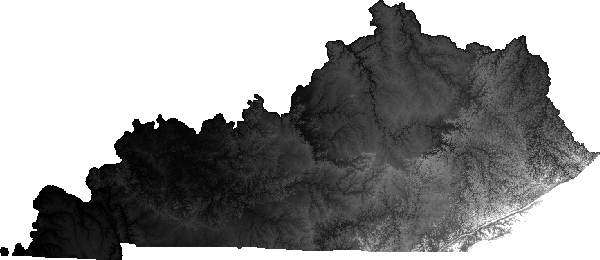

In [9]:
# load them in
dem = arcpy.sa.Raster(dem_data)
dem

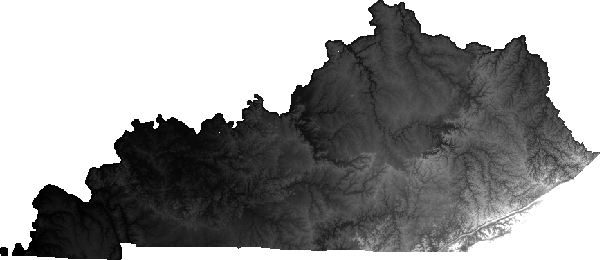

In [10]:
dsm = arcpy.sa.Raster(dsm_data)
dsm

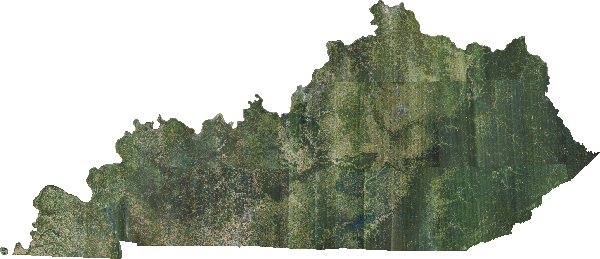

In [11]:
naip = arcpy.sa.Raster(naip_data)
naip

In [12]:
dem_e = arcpy.sa.ExtractByMask(dem, 'boundary')

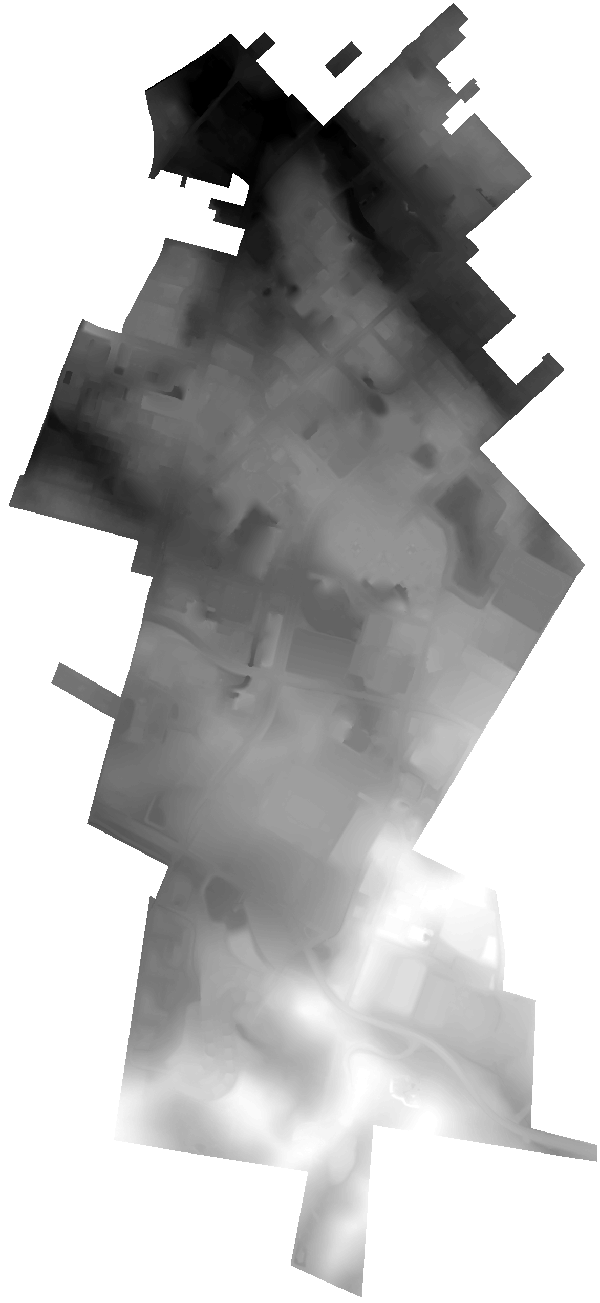

In [13]:
dem_e

In [14]:
dem_e.save("campusDem")

In [15]:
dsm_e = arcpy.sa.ExtractByMask(dsm, 'boundary')
naip_e = arcpy.sa.ExtractByMask(naip, 'boundary')

dsm_e.save("campusDsm")
naip_e.save("campusNaip")

In [16]:
dsm_e.save("campusDsm") 
naip_e.save("campusNaip")

In [17]:
# need to create a aspect using DEM, height using DSM - DEM, and nvdi layer using NAIP

In [18]:
height = (dsm_e - dem_e)

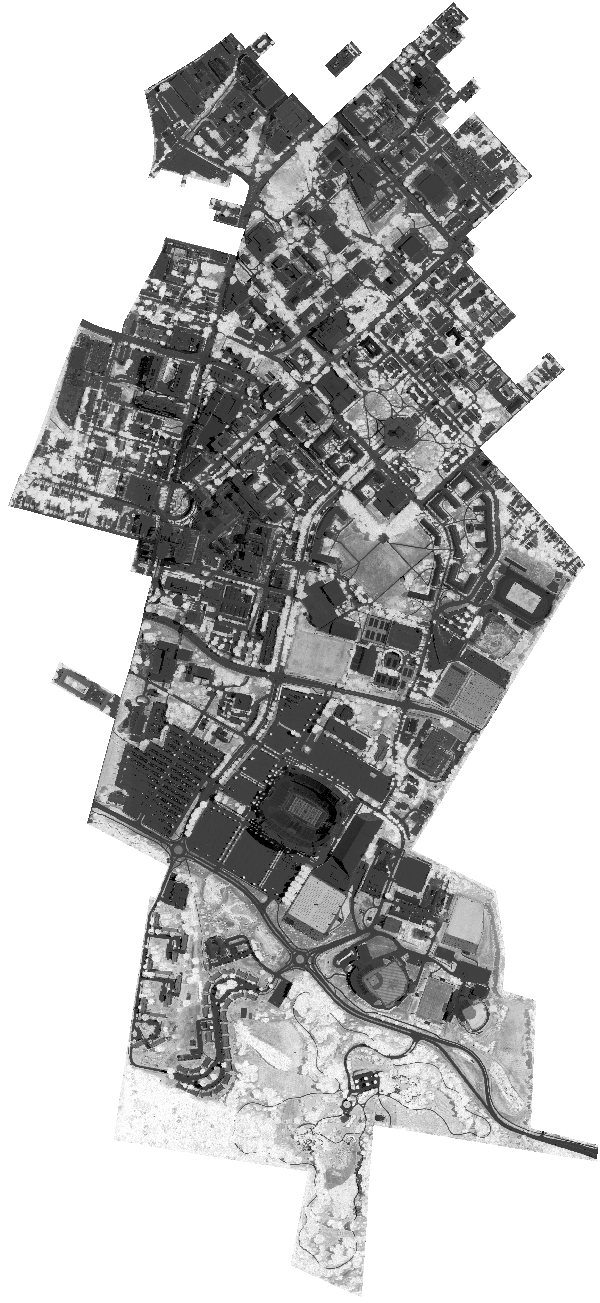

In [19]:
#Create NDVI
ndvi = arcpy.ia.NDVI(naip_e)
ndvi.save('ndvi')

# Verify
ndvi

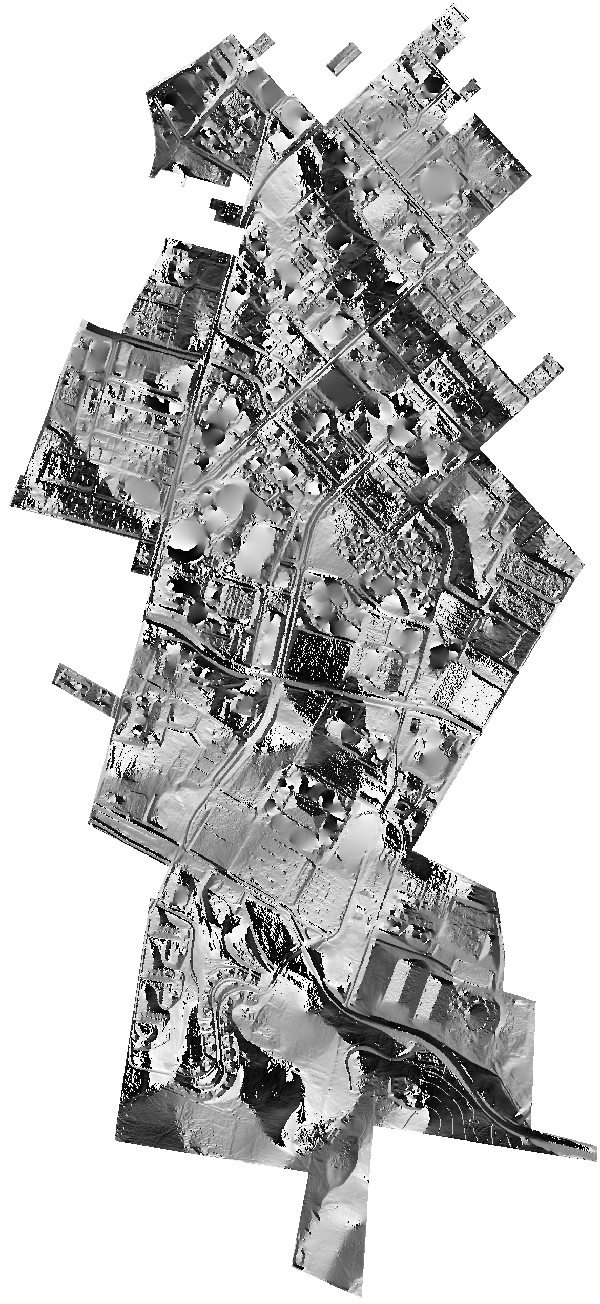

In [20]:
aspect = arcpy.sa.SurfaceParameters('dem_e', 'ASPECT', "#", "#", "#", "Foot")
aspect

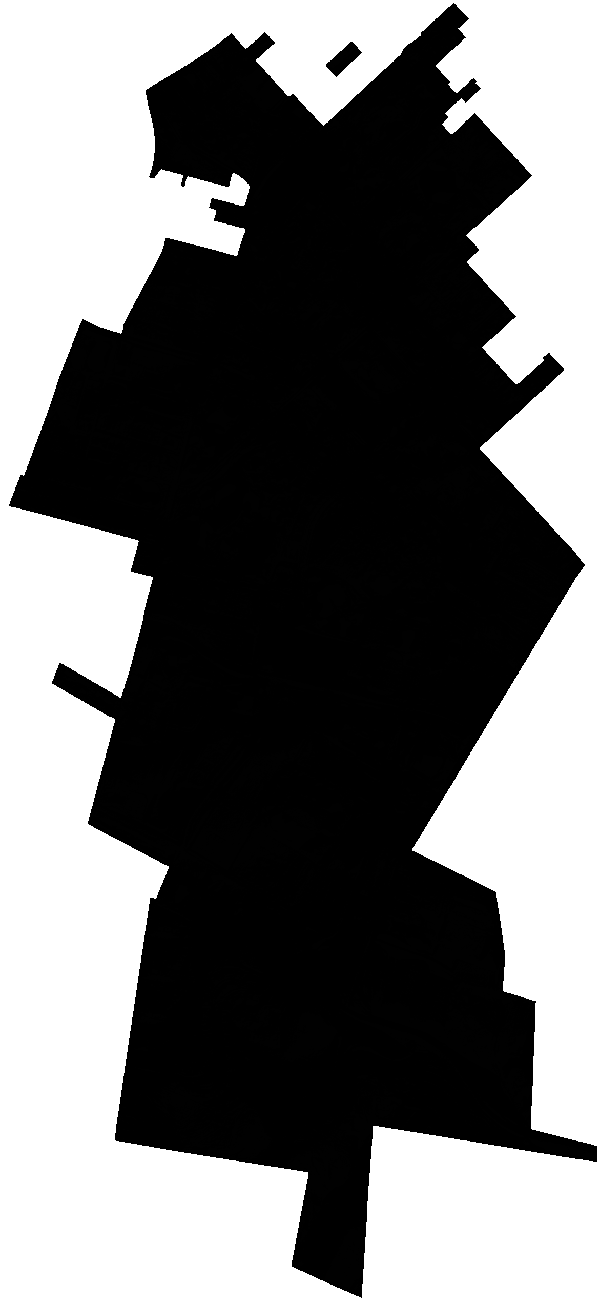

In [21]:
south = (aspect > 135) & (aspect < 225)
south

In [22]:
picnic = (ndvi > 0.2) & (height < 5) & (south)

In [23]:
dsm_e.getStatistics()

[{'min': 935.0, 'max': 1241.0, 'mean': 1004.5249551839861, 'standardDeviation': 28.566051039396182, 'sum': 0.0, 'skipX': 1, 'skipY': 1, 'count': 0.0}]

In [24]:
print(f'Minimum elevation: {height.minimum}')
print(f'Maximum elevation: {height.maximum}')

Minimum elevation: -23.97119140625
Maximum elevation: 253.1680908203125


In [28]:
# Extract locations with the minimum elevation
min_elev = arcpy.sa.ExtractByAttributes(dem_e, f'VALUE = {height.minimum}')
arcpy.conversion.RasterToPoint(min_elev, 'min')

# Extract locations with the maximum elevation
max_elev = arcpy.sa.ExtractByAttributes(height, f'VALUE = {height.maximum}')
arcpy.conversion.RasterToPoint(max_elev, 'max')


<Result 'c:/SchimpffGIS/data/campus.gdb/max'>